<a href="https://colab.research.google.com/github/JH-Y-324/first-repository/blob/master/detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving fraud.csv to fraud.csv


In [2]:
import pandas as pd

df = pd.read_csv("fraud.csv")
df.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,...,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,...,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,...,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,...,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [4]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [5]:
df = df.drop(columns=['first', 'last', 'street', 'city', 'state', 'zip'])

In [6]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [7]:
df["cc_num_masked"] = df["cc_num"].astype(str).apply(
    lambda x: x[:4] + "*" * (len(x) - 4)
)
df.drop(columns=["cc_num"], inplace=True)


In [8]:
df

,trans_date_trans_time,merchant,category,amt,gender,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,cc_num_masked
0,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,6304********
1,2019-01-01 00:12:34,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,4956***************
2,2019-01-01 00:17:16,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,1800***********
3,2019-01-01 00:20:15,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,3749***********
4,2019-01-01 00:23:41,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,2712************
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,fraud_Botsford and Sons,home,134.26,F,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,6011************
491130,2020-12-31 23:56:57,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,2131***********
491131,2020-12-31 23:59:09,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,3556************
491132,2020-12-31 23:59:15,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,6011************


In [9]:
df.drop(columns=["trans_num"], inplace=True)


In [10]:
df.head()

,trans_date_trans_time,merchant,category,amt,gender,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,cc_num_masked
0,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,6304********
1,2019-01-01 00:12:34,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,Operational researcher,1980-12-21,1325376754,40.079588,-74.848087,0,4956***************
2,2019-01-01 00:17:16,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,1325377036,40.021888,-74.228188,0,1800***********
3,2019-01-01 00:20:15,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,Police officer,1971-11-05,1325377215,42.360426,-83.552316,0,3749***********
4,2019-01-01 00:23:41,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1325377421,29.737426,-90.853194,0,2712************


In [11]:
df.drop(columns=["unix_time"], inplace=True)

In [12]:
df.head()

,trans_date_trans_time,merchant,category,amt,gender,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,cc_num_masked
0,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,6304********
1,2019-01-01 00:12:34,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,Operational researcher,1980-12-21,40.079588,-74.848087,0,4956***************
2,2019-01-01 00:17:16,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,40.021888,-74.228188,0,1800***********
3,2019-01-01 00:20:15,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,Police officer,1971-11-05,42.360426,-83.552316,0,3749***********
4,2019-01-01 00:23:41,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,29.737426,-90.853194,0,2712************


In [13]:
df["dob"] = pd.to_datetime(df["dob"])
df["age"] = 2019 - df["dob"].dt.year
df.drop(columns=["dob"], inplace=True)
df

,trans_date_trans_time,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,cc_num_masked,age
0,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,6304********,41
1,2019-01-01 00:12:34,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,Operational researcher,40.079588,-74.848087,0,4956***************,39
2,2019-01-01 00:17:16,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,Leisure centre manager,40.021888,-74.228188,0,1800***********,45
3,2019-01-01 00:20:15,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,Police officer,42.360426,-83.552316,0,3749***********,48
4,2019-01-01 00:23:41,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,"Designer, furniture",29.737426,-90.853194,0,2712************,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,fraud_Botsford and Sons,home,134.26,F,34.2651,-77.8670,186140,English as a second language teacher,34.853497,-78.664158,0,6011************,36
491130,2020-12-31 23:56:57,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,34.0326,-82.2027,1523,Research scientist (physical sciences),35.008839,-81.475156,0,2131***********,35
491131,2020-12-31 23:59:09,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,29.661049,-96.186633,0,3556************,20
491132,2020-12-31 23:59:15,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,46.658340,-119.715054,0,6011************,38


In [15]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
df["hour"] = df["trans_date_trans_time"].dt.hour
df["weekday"] = df["trans_date_trans_time"].dt.weekday
df["is_night"] = df["hour"].between(0, 6).astype(int)
df

,trans_date_trans_time,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,cc_num_masked,age,hour,weekday,is_night
0,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,6304********,41,0,1,1
1,2019-01-01 00:12:34,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,Operational researcher,40.079588,-74.848087,0,4956***************,39,0,1,1
2,2019-01-01 00:17:16,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,Leisure centre manager,40.021888,-74.228188,0,1800***********,45,0,1,1
3,2019-01-01 00:20:15,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,Police officer,42.360426,-83.552316,0,3749***********,48,0,1,1
4,2019-01-01 00:23:41,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,"Designer, furniture",29.737426,-90.853194,0,2712************,42,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,fraud_Botsford and Sons,home,134.26,F,34.2651,-77.8670,186140,English as a second language teacher,34.853497,-78.664158,0,6011************,36,23,3,0
491130,2020-12-31 23:56:57,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,34.0326,-82.2027,1523,Research scientist (physical sciences),35.008839,-81.475156,0,2131***********,35,23,3,0
491131,2020-12-31 23:59:09,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,29.661049,-96.186633,0,3556************,20,23,3,0
491132,2020-12-31 23:59:15,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,46.658340,-119.715054,0,6011************,38,23,3,0


In [19]:
# 밤 전체 거래 수
night_total = df[df["is_night"] == 1].shape[0]

# 낮 전체 거래 수
day_total = df[df["is_night"] == 0].shape[0]

# 밤 사기 건수
night_fraud = df[(df["is_night"] == 1) & (df["is_fraud"] == 1)].shape[0]

# 낮 사기 건수
day_fraud = df[(df["is_night"] == 0) & (df["is_fraud"] == 1)].shape[0]

# 비율 계산
p_fraud_night = night_fraud / night_total
p_fraud_day = day_fraud / day_total

p_fraud_night, p_fraud_day

(0.0073042570899740375, 0.0015975335640340644)

In [20]:
import numpy as np

df["amt_log"] = np.log1p(df["amt"])
df["high_amt_flag"] = (df["amt"] > df["amt"].median()).astype(int)

In [23]:
df.groupby("high_amt_flag")["is_fraud"].mean()

,is_fraud
high_amt_flag,
0,0.001340
1,0.003726


<Axes: xlabel='is_fraud', ylabel='amt_log'>

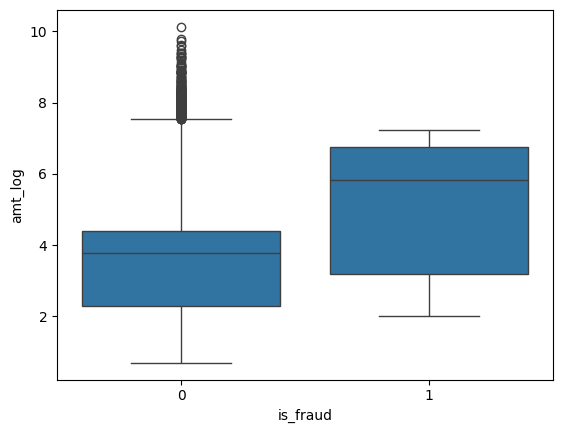

In [24]:
import seaborn as sns

sns.boxplot(x="is_fraud", y="amt_log", data=df)

In [22]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

df["distance"] = haversine(df["lat"], df["long"], df["merch_lat"], df["merch_long"])
df

,trans_date_trans_time,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,cc_num_masked,age,hour,weekday,is_night,amt_log,high_amt_flag,distance
0,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,6304********,41,0,1,1,4.684259,1,30.212176
1,2019-01-01 00:12:34,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,Operational researcher,40.079588,-74.848087,0,4956***************,39,0,1,1,3.822317,1,84.702120
2,2019-01-01 00:17:16,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,Leisure centre manager,40.021888,-74.228188,0,1800***********,45,0,1,1,3.856087,1,67.847742
3,2019-01-01 00:20:15,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,Police officer,42.360426,-83.552316,0,3749***********,48,0,1,1,4.175771,1,22.303906
4,2019-01-01 00:23:41,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,"Designer, furniture",29.737426,-90.853194,0,2712************,42,0,1,1,3.280159,0,79.591943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,fraud_Botsford and Sons,home,134.26,F,34.2651,-77.8670,186140,English as a second language teacher,34.853497,-78.664158,0,6011************,36,23,3,0,4.907199,1,98.027030
491130,2020-12-31 23:56:57,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,34.0326,-82.2027,1523,Research scientist (physical sciences),35.008839,-81.475156,0,2131***********,35,23,3,0,3.276767,0,127.382373
491131,2020-12-31 23:59:09,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,29.661049,-96.186633,0,3556************,20,23,3,0,4.725971,1,100.074420
491132,2020-12-31 23:59:15,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,46.658340,-119.715054,0,6011************,38,23,3,0,4.475972,1,80.759302
